In [1]:
!pip install tqdm

In [2]:
# Mounting Google drive
from google.colab import drive

# For browsing into different folders
import os

# To Hide the output of TenorFlow in loops
import subprocess

# Toolkit packages
import random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# progress bar
from tqdm import tqdm # progress bar
import time

#Scikitlearn
from sklearn.decomposition import PCA

#MCDM
#from pyDecision.algorithm import fuzzy_vikor_method
#from __future__ import absolute_import, division, print_function

# Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model, layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.utils.vis_utils import plot_model

# Depicting Neural Network Architecture
import networkx as nx

In [3]:
# Mountiing Google Drive and a speciefic folder for t

drive.mount('/content/drive')
cp = '/content/drive/MyDrive/ColabNotebooks/deep-learning-mcdm/'
os.chdir(cp)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# There are 70 alternatives and 20 criteria in this dataset.
# Alternatives are pipelines and criteria descreptions are as follows:
criteria_info = pd.read_excel(cp+'data/criteria.xlsx').dropna()
criteria_info

,Variable,Description,Weight,Cost/Benefit,Min/Max
0,X01,Pipeline length,0.157824,cost,min
1,X02,Aggregation of liquidity,0.018025,cost,min
2,X03,Pressure variation due to height variation,0.035125,cost,min
3,X04,Increasing of pipeline stations,0.031695,cost,min
4,X05,Corrosion,0.010525,benefit,max
5,X06,Line break valve (LBV),0.010025,cost,min
6,X07,Frizing of pipeline,0.010225,cost,min
7,X08,Being flat to build ROW,0.100465,benefit,max
8,X09,Natural twist of route,0.012525,cost,min
9,X10,Passing from Natural barrier,0.083225,cost,min


In [5]:
# For each row (alternative) there are 20 features (criteria)

old_routes = pd.read_excel(cp+'data/old_routes.xlsx').dropna().iloc[:,1:21]
old_routes

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,84.6,14,28,2,2,9,9,39,1090,27,3,4,36,12,2,19,2,23.9,33,8
1,84.8,14,27,2,2,10,9,36,1060,27,3,4,36,12,2,7,2,23.9,34,9
2,86.5,16,32,2,2,10,10,28,1262,32,3,4,42,9,2,4,1,23.7,28,8
3,88.4,12,25,2,2,9,8,42,997,26,4,4,33,14,2,20,2,21.9,35,9
4,89.8,13,26,2,1,9,8,42,1028,26,3,4,34,16,2,17,2,23.3,38,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,92.5,9,18,2,2,7,6,59,700,18,4,3,23,18,3,36,3,21.3,43,10
67,94.2,9,18,1,2,7,6,60,668,18,4,3,22,19,3,36,3,21.6,44,11
68,95.0,8,17,1,2,8,6,55,608,18,4,3,21,20,3,12,2,22.6,45,14
69,96.7,6,13,1,3,7,4,63,410,13,4,3,15,23,3,15,2,22.0,50,16


In [6]:
# There are five group of decison makers [in the dataset, So: 355/5 = 71.] that
#have rated each feature for all the criterias.

old_routes_ratings = pd.read_excel(cp+'data/old_routes_ratings.xlsx').dropna().iloc[:,1:21]
pd.read_excel(cp+'data/old_routes_ratings.xlsx').dropna().iloc[:,0:21]

,DMbyRoutes,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,...,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20
0,DM1A01,4,2,2,3,3,2,2,3,2,...,4,2,3,3,5,4,3,2,3,4
1,DM1A02,4,2,2,3,3,2,2,2,2,...,4,2,2,3,5,2,3,2,3,4
2,DM1A03,4,2,2,3,3,2,2,2,2,...,4,2,2,3,5,2,2,2,3,5
3,DM1A04,4,2,2,3,3,2,2,2,2,...,3,2,3,3,4,3,3,3,3,5
4,DM1A05,4,2,2,3,2,2,2,3,2,...,4,2,3,3,4,2,3,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,DM5A67,3,2,2,3,3,3,4,3,2,...,3,3,3,3,3,3,3,4,3,3
351,DM5A68,3,2,2,4,3,3,3,4,2,...,3,3,3,3,3,4,3,3,3,3
352,DM5A69,3,2,2,4,3,2,4,4,2,...,3,3,3,3,3,2,3,2,3,3
353,DM5A70,3,3,2,4,4,3,4,4,2,...,3,3,4,3,3,3,3,3,3,2


In [7]:
# 6 new alternatives with the following measurements are to be built.

new_routes = pd.read_excel(cp+'data/new_routes.xlsx').dropna().iloc[:,1:21]
new_routes

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,104.5,1,2,0,3,3,0,95,12,3,6,1,0.5,30,4,69,5,18.14,60,15
1,100.0,2,4,0,3,5,1,80,15,5,5,2,2.0,30,4,20,3,20.83,60,19
2,90.0,15,30,2,2,10,10,30,1200,30,3,4,40.0,10,2,5,1,24.30,30,8
3,78.0,18,36,3,1,11,12,20,1450,35,2,5,48.0,6,1,2,1,25.83,24,5
4,115.0,1,1,0,2,2,0,96,10,1,4,0,0.0,40,2,58,3,21.14,75,7
5,83.0,16,33,3,1,11,11,25,1325,33,3,5,44.0,8,2,4,1,23.12,27,7


In [8]:
#Now, defining two functions for converting lickert scale into fuzzy number

# How to covert the lickert to fuzzy number
def likert_to_fuzzy_vector(likert_scale):
    if likert_scale == 5:
        return [0.75, 1, 1]
    elif likert_scale == 4:
        return [0.5, 0.75, 1]
    elif likert_scale == 3:
        return [0.25, 0.5, 0.75]
    elif likert_scale == 2:
        return [0, 0.25, 0.5]
    else:
      return [0, 0, 0.25]

# Coverting a matrix of lickert values to an array of fuzzy numbers
def matrix_to_fuzzy_matrix(matrix):
    n, p = matrix.shape
    flattened_matrix = matrix.flatten()
    fuzzy_vector = []

    for element in flattened_matrix:
        fuzzy_vector.append(likert_to_fuzzy_vector(element))
    flattend_fuzzy_matrix = np.array(fuzzy_vector)

    return np.reshape(flattend_fuzzy_matrix, (n, p, 3))

In [9]:
# Here, it is time to combine the ideas of five groups

# Separating decision makers rating into separate datasets
decision_maker_1_rating = old_routes_ratings.iloc[0:71,]
decision_maker_2_rating = old_routes_ratings.iloc[71:142,]
decision_maker_3_rating = old_routes_ratings.iloc[142:213,]
decision_maker_4_rating = old_routes_ratings.iloc[213:284,]
decision_maker_5_rating = old_routes_ratings.iloc[284:,]

# Turning the decision makers' ratings into fuzzy numbers
fuzzy_decision_maker_1_rating = matrix_to_fuzzy_matrix(decision_maker_1_rating.to_numpy())
fuzzy_decision_maker_2_rating = matrix_to_fuzzy_matrix(decision_maker_2_rating.to_numpy())
fuzzy_decision_maker_3_rating = matrix_to_fuzzy_matrix(decision_maker_3_rating.to_numpy())
fuzzy_decision_maker_4_rating = matrix_to_fuzzy_matrix(decision_maker_4_rating.to_numpy())
fuzzy_decision_maker_5_rating = matrix_to_fuzzy_matrix(decision_maker_5_rating.to_numpy())

# Compromising and combining all decisionnmakers ratings
combined_fuzzy_ratings = fuzzy_decision_maker_1_rating
for i in range(71):
  for j in range(20):
    combined_fuzzy_ratings[i,j,0] = np.min([fuzzy_decision_maker_1_rating[i,j,0],
                                  fuzzy_decision_maker_2_rating[i,j,0],
                                  fuzzy_decision_maker_3_rating[i,j,0],
                                  fuzzy_decision_maker_4_rating[i,j,0],
                                  fuzzy_decision_maker_5_rating[i,j,0]])
    combined_fuzzy_ratings[i,j,1] = np.mean([fuzzy_decision_maker_1_rating[i,j,1],
                                  fuzzy_decision_maker_2_rating[i,j,1],
                                  fuzzy_decision_maker_3_rating[i,j,1],
                                  fuzzy_decision_maker_4_rating[i,j,1],
                                  fuzzy_decision_maker_5_rating[i,j,1]])
    combined_fuzzy_ratings[i,j,2] = np.max([fuzzy_decision_maker_1_rating[i,j,2],
                                  fuzzy_decision_maker_2_rating[i,j,2],
                                  fuzzy_decision_maker_3_rating[i,j,2],
                                  fuzzy_decision_maker_4_rating[i,j,2],
                                  fuzzy_decision_maker_5_rating[i,j,2]])
combined_fuzzy_ratings.shape

(71, 20, 3)

In [10]:
# Running fuzzy vikor for ranking old routes

# Step 1: Define criteria and alternatives
criteria = criteria_info["Description"]
alternatives = pd.read_excel(cp+'data/old_routes.xlsx').dropna().iloc[:,0]

# Step 2: Assign weights to criteria
weights = np.array(criteria_info["Weight"])  # Convert to numpy array

# Step 3: Define the fuzzy decision matrix
# Replace the values below with your actual fuzzy triangle numbers matrix
fuzzy_matrix = combined_fuzzy_ratings

# Step 4: Calculate the fuzzy synthetic decision matrix
max_values = np.max(fuzzy_matrix, axis=2)
synthetic_matrix = np.prod(max_values[:, :, np.newaxis] ** weights, axis=1)

# Step 5: Normalize the fuzzy synthetic decision matrix
normalized_matrix = synthetic_matrix / np.sum(synthetic_matrix)

# Step 6: Determine the best and worst values for each criterion
best_values = np.max(normalized_matrix, axis=0)
worst_values = np.min(normalized_matrix, axis=0)

# Step 7: Calculate the VIKOR scores
s_values = np.zeros(len(alternatives))
r_values = np.zeros(len(alternatives))
q_values = np.zeros(len(alternatives))

for i in range(len(alternatives)):
    s_values[i] = np.sum(weights * (best_values - normalized_matrix[i]))
    r_values[i] = np.max(np.abs(best_values - normalized_matrix[i]))
    q_values[i] = (s_values[i] - np.min(s_values)) / (np.max(s_values) - np.min(s_values))

vikor_scores = q_values * r_values

# Step 8: Rank the alternatives
ranked_indices = np.argsort(vikor_scores)[::-1]  # Sort in descending order
ranked_alternatives = [alternatives[i] for i in ranked_indices]

In [11]:
# Print the results
print("VIKOR Results:")
print("--------------")
print("Alternative\tS-Value\t\tR-Value\t\tVIKOR Score\tRanking")
print("---------------------------------------------------------------")
for i, alternative in enumerate(ranked_alternatives):
    print(f"{alternative}\t\t{s_values[ranked_indices[i]]:.4f}\t\t{r_values[ranked_indices[i]]:.4f}\t\t{vikor_scores[ranked_indices[i]]:.4f}\t\t{i+1}")

VIKOR Results:
--------------
Alternative	S-Value		R-Value		VIKOR Score	Ranking
---------------------------------------------------------------
Water Pipeline 29		0.0003		0.0004		0.0004		1
Water Pipeline 27		0.0003		0.0004		0.0004		2
Water Pipeline 28		0.0003		0.0004		0.0004		3
Water Pipeline 61		0.0003		0.0004		0.0004		4
Water Pipeline 14		0.0003		0.0004		0.0004		5
Water Pipeline 41		0.0003		0.0004		0.0004		6
Water Pipeline 64		0.0003		0.0004		0.0004		7
Water Pipeline 60		0.0003		0.0004		0.0004		8
Water Pipeline 59		0.0003		0.0004		0.0004		9
Water Pipeline 03		0.0003		0.0004		0.0004		10
Water Pipeline 40		0.0003		0.0004		0.0003		11
Water Pipeline 42		0.0003		0.0004		0.0003		12
Water Pipeline 02		0.0002		0.0003		0.0003		13
Water Pipeline 62		0.0003		0.0004		0.0003		14
Water Pipeline 63		0.0003		0.0004		0.0003		15
Water Pipeline 46		0.0003		0.0004		0.0003		16
Water Pipeline 17		0.0002		0.0003		0.0003		17
Water Pipeline 09		0.0002		0.0003		0.0003		18
Water Pipeline 01		0.0002		0.0003		0.

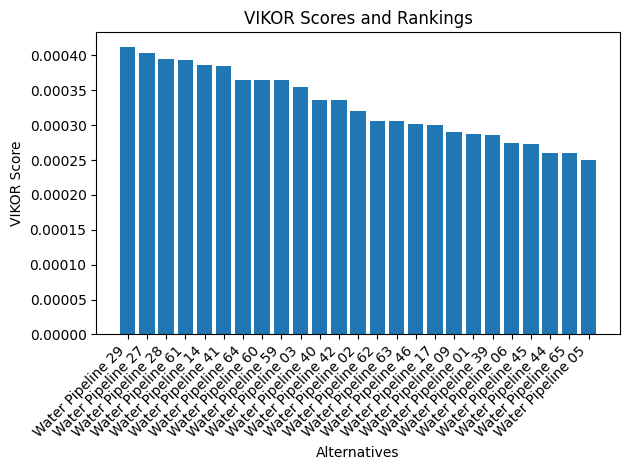

In [12]:
# Plot the chart
fig, ax = plt.subplots()
ax.bar(range(len(ranked_alternatives[:25])), vikor_scores[ranked_indices[:25]])
ax.set_xlabel('Alternatives')
ax.set_ylabel('VIKOR Score')
ax.set_title('VIKOR Scores and Rankings')
ax.set_xticks(range(len(ranked_alternatives[:25])))
ax.set_xticklabels(ranked_alternatives[:25], rotation=45, ha='right')
#plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

<ipython-input-14-2574a829e5f5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_routes = old_routes.append(new_routes)


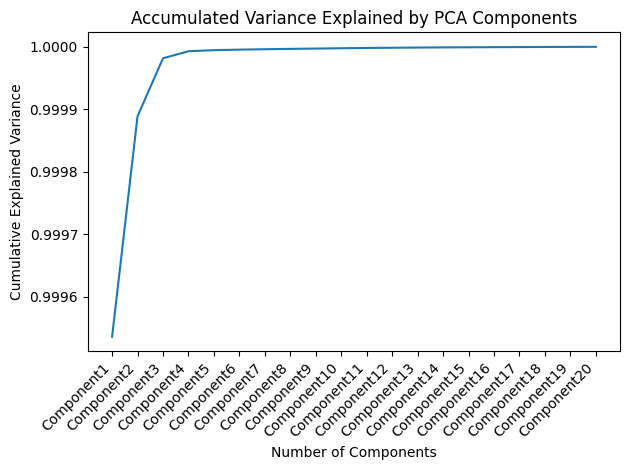

In [14]:
## First Approach

# Finding the best among the 6 new features using PCA on the old alternatives
#and find the rotation matrix. then, using fuzzy vikor rank the old alternatives
#and label the alternatives with their ranks. Finally, plot the old alternatives
#with their ranks along with the new ones on the rotated space based on the best
#PCA features based on explained variance.

all_routes = old_routes.append(new_routes)

pca = PCA().fit(np.array(old_routes))


fig, img = plt.subplots()
x_ind = [f'Component{i+1}' for i in range(len(pca.explained_variance_ratio_))]
img.plot(x_ind, np.cumsum(pca.explained_variance_ratio_))

# Add labels and title
img.set_xlabel('Number of Components')
img.set_ylabel('Cumulative Explained Variance')
img.set_title('Accumulated Variance Explained by PCA Components')
img.set_xticks(range(len(x_ind)))
img.set_xticklabels(x_ind, rotation=45, ha='right')


# Show the plot
#plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

<ipython-input-15-d8412755e073>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image = pca.fit_transform(X=old_routes.append(new_routes))


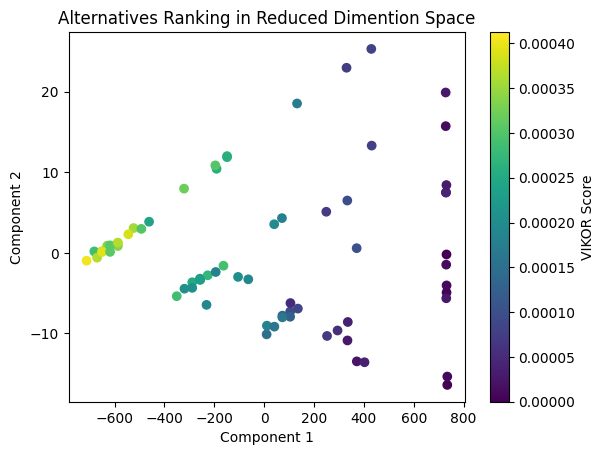

In [15]:
# Fit PCA model
image = pca.fit_transform(X=old_routes.append(new_routes))
old_image = image[:71,:]
new_image = image[71:,:]

# Transform old routes
x = old_image[:,0]
y = old_image[:,1]
colors = vikor_scores

# Plot old routes
plt.scatter(x, y, c=colors)

# Add labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Alternatives Ranking in Reduced Dimention Space')

# Add a colorbar
plt.colorbar(label='VIKOR Score')

# Transform new routes
x_new = new_image[:,0]
y_new = new_image[:,1]
label_new = []

# Add new routs
#plt.scatter(x_new, y_new, color='red')

# Creating points
#points = []
#for i in range(len(x_new)):
#  points.append((x_new[i],y_new[i]))

# Add to plot
#for i in range(len(points)):
#    plt.annotate(f'New {i+1}' , xy=points[i], xytext=(round((points[i])[0],1)-150,
#                                               round((points[i])[1],1)+1.5))

# Show the plot
#plt.gcf().set_size_inches(10, 5)
plt.show()

In [16]:
# Since we would want to use a panelized model, we should first select the
#best lambda

# Define a set of lambdas
lambdas = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
           0.5, 1, 2]
models=[None] * (len(lambdas)*3)
loss=np.zeros((3,len(lambdas)))


# Model Creation:

x_train = old_routes
y_train = combined_fuzzy_ratings

lambda_ = lambdas[2]
for i in [0,1,2]:
  for j in range(len(lambdas)):
    lambda_ = lambdas[j]
    models[i*len(lambdas)+j] =  Sequential(
        [
            Dense(64, activation = 'relu',
                  kernel_regularizer=tf.keras.regularizers.l1(lambda_)),
            Dense(32, activation = 'relu',
                  kernel_regularizer=tf.keras.regularizers.l1(lambda_)),
            Dense(20, activation = 'sigmoid')
        ]
    )
    models[i*len(lambdas)+j].compile(
        loss=MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(lr=0.01)
    )

    models[i*len(lambdas)+j].fit(
        x_train,y_train[:,:,i],
        epochs=200, batch_size = 20
    )
    print(f"Finished lambda = {lambda_}")

    loss[i,j] = models[i*len(lambdas)+j].evaluate(x_train,
                                             combined_fuzzy_ratings[:,:,i])

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.2389
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2130
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2099
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2098
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2098
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2095
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2088
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2079
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2072
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2056
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2033
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2034
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

Epoch 1/200
4/4 [==============================] - 2s 4ms/step - loss: 4.4633
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 4.3172
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 4.2052
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 4.0939
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 3.9841
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 3.8739
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 3.7706
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 3.6690
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 3.5690
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 3.4693
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 3.3724
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 3.2758
Epoch 13/200
4/4 [==============================] - 0s 10ms/s

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 8.8425
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 8.5645
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 8.3343
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 8.1012
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 7.8690
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 7.6374
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 7.4027
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 7.1406
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 6.8953
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 6.6832
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 6.4750
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 6.2652
Epoch 13/200
4/4 [==============================] - 0s 6ms/st

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 13.1053
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 12.7206
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 12.3381
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 11.9586
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 11.5793
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 11.1773
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 10.8277
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 10.4930
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 10.1342
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 9.8038
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 9.4884
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 9.1769
Epoch 13/200
4/4 [==============================] - 

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 17.4792
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 16.9522
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 16.4342
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 15.9395
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 15.4309
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 14.9567
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 14.4721
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 14.0153
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 13.5675
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 13.1224
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 12.6834
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 12.2443
Epoch 13/200
4/4 [==============================]

3/3 [==============================] - 0s 6ms/step - loss: 0.0310


Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 21.8130
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 21.1973
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 20.5840
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 19.9744
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 19.3538
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 18.7530
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 18.1708
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 17.5983
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 17.0392
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 16.4813
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 15.9492
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 15.4257
Epoch 13/200
4/4 [==============================]

3/3 [==============================] - 0s 4ms/step - loss: 0.0367


Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 25.9375
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 25.1616
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 24.3954
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 23.6284
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 22.8985
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 22.1797
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 21.4411
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 20.7439
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 20.0542
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 19.3823
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 18.7292
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 18.0891
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 29.5856
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 28.6927
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 27.8288
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 26.9499
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 26.0952
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 25.2845
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 24.4813
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 23.6898
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 22.9115
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 22.1418
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 21.3799
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 20.6296
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 33.7224
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 32.6722
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 31.6365
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 30.6018
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 29.5992
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 28.6440
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 27.7009
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 26.7621
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 25.8637
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 24.9742
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 24.0959
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 23.2377
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 38.3892
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 37.2113
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 36.0539
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 34.9135
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 33.8048
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 32.6941
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 31.6186
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 30.5664
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 29.5330
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 28.5135
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 27.5093
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 26.4767
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 42.8573
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 41.5726
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 40.2919
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 39.0376
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 37.8063
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 36.5893
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 35.3843
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 34.1778
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 33.0055
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 31.8400
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 30.7154
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 29.5848
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 83.7208
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 81.0922
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 78.4962
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 75.9647
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 73.4923
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 71.0503
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 68.6527
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 66.2990
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 63.9812
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 61.7090
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 59.4980
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 57.3277
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 210.8907
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 204.3195
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 197.9141
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 191.6512
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 185.4676
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 179.3829
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 173.3812
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 167.4554
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 161.6491
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 155.9192
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 150.2716
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 144.7359
Epoch 13/200
4/4 [===================

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 422.7138
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 409.5927
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 396.6990
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 384.0639
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 371.6673
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 359.4912
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 347.4702
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 335.6282
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 324.0002
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 312.5820
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 301.3700
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 290.3708
Epoch 13/200
4/4 [===================

Epoch 1/200
4/4 [==============================] - 2s 5ms/step - loss: 852.5457
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 826.3619
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 800.6927
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 775.3953
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 750.4002
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 725.8810
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 701.7969
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 678.1370
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 654.7942
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 631.8627
Epoch 11/200
4/4 [==============================] - 0s 7ms/step - loss: 609.4476
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 587.4391
Epoch 13/200
4/4 [==================

Epoch 1/200
4/4 [==============================] - 4s 6ms/step - loss: 0.2822
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2704
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2662
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2589
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2584
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2564
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2528
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.2508
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2520
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2502
Epoch 11/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2502
Epoch 12/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2477
Epoch 13/200
4/4 [==============================] - 0s 7ms

Epoch 1/200
4/4 [==============================] - 2s 8ms/step - loss: 4.5969
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 4.4699
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 4.3419
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 4.2289
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 4.1216
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 4.0143
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 3.8965
Epoch 8/200
4/4 [==============================] - 0s 8ms/step - loss: 3.7890
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 3.6874
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 3.5900
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 3.4859
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 3.3756
Epoch 13/200
4/4 [==============================] - 0s 5ms/s

Epoch 1/200
4/4 [==============================] - 2s 5ms/step - loss: 8.6410
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 8.3795
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 8.1471
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 7.9201
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 7.6934
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 7.4669
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 7.2447
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 7.0304
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 6.8168
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 6.6068
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 6.3979
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 6.1892
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 13.0064
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 12.6245
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 12.2639
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 11.9046
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 11.5478
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 11.1942
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 10.8449
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 10.5071
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 10.1775
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 9.8542
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 9.5350
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 9.2160
Epoch 13/200
4/4 [==============================] - 

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 17.2237
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 16.7063
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 16.2278
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 15.7504
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 15.2757
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 14.8004
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 14.3426
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 13.8914
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 13.4485
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 13.0125
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 12.5815
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 12.1552
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 21.3133
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 20.6660
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 20.0460
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 19.4369
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 18.8381
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 18.2509
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 17.6790
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 17.1112
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 16.5532
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 16.0026
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 15.4644
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 14.9353
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 25.4467
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 24.6548
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 23.8875
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 23.1341
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 22.3936
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 21.6639
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 20.9467
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 20.2425
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 19.5530
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 18.8773
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 18.2122
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 17.5610
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 29.7707
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 28.8549
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 27.9552
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 27.0806
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 26.2255
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 25.3838
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 24.5553
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 23.7310
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 22.9159
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 22.1225
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 21.3421
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 20.5681
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 34.1793
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 33.1320
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 32.1069
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 31.0998
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 30.1103
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 29.1209
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 28.1678
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 27.2412
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 26.3370
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 25.4367
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 24.5616
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 23.6966
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 38.4763
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 37.2943
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 36.1441
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 35.0177
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 33.9081
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 32.8143
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 31.7362
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 30.6771
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 29.6376
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 28.6165
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 27.6116
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 26.6162
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 42.7652
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 41.4654
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 40.1885
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 38.9526
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 37.7472
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 36.5556
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 35.3820
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 34.2233
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 33.0784
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 31.9563
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 30.8509
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 29.7704
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 84.3844
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 81.7826
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 79.2177
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 76.6954
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 74.2156
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 71.7757
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 69.3756
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 67.0307
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 64.7216
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 62.4429
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 60.2077
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 58.0141
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 208.4953
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 201.9342
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 195.4725
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 189.1316
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 182.9297
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 176.8031
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 170.7518
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 164.8262
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 159.0192
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 153.2895
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 147.6382
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 142.1064
Epoch 13/200
4/4 [===================

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 417.7180
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 404.6188
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 391.7397
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 379.0658
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 366.6048
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 354.2651
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 342.1141
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 330.2236
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 318.5164
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 307.0194
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 295.7304
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 284.6850
Epoch 13/200
4/4 [===================

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 854.8874
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 828.5949
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 802.7272
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 777.3364
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 752.3215
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 727.5977
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 703.2589
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 679.2938
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 655.6907
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 632.5225
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 609.6938
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 587.3094
Epoch 13/200
4/4 [===================

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 0.2446
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2367
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2203
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2211
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2205
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2200
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2200
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2200
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2199
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2199
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2199
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2197
Epoch 13/200
4/4 [==============================] - 0s 5ms/st

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 4.6808
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 4.5224
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 4.4047
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 4.2870
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 4.1724
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 4.0530
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 3.9479
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 3.8371
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 3.7274
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 3.6054
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 3.4885
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 3.3869
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 8.8471
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 8.5779
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 8.3080
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 8.0667
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 7.8057
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 7.5680
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 7.3338
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 7.1075
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 6.8843
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 6.6647
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 6.4477
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 6.2375
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 12.9843
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 12.5971
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 12.2237
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 11.8523
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 11.4848
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 11.1223
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 10.7662
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 10.4105
Epoch 9/200
4/4 [==============================] - 0s 7ms/step - loss: 10.0486
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 9.7103
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 9.3770
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 9.0491
Epoch 13/200
4/4 [==============================] - 

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 16.8390
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 16.3155
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 15.7959
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 15.2732
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 14.7700
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 14.2776
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 13.8187
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 13.3610
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 12.9033
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 12.4568
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 12.0225
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 11.5930
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 21.6865
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 21.0315
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 20.3854
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 19.7491
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 19.1243
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 18.5029
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 17.8793
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 17.2741
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 16.7029
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 16.1470
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 15.5973
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 15.0486
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 25.4979
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 24.7456
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 23.9805
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 23.2330
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 22.5046
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 21.7866
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 21.0758
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 20.3734
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 19.6797
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 18.9890
Epoch 11/200
4/4 [==============================] - 0s 8ms/step - loss: 18.3205
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 17.6668
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 7ms/step - loss: 30.2601
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 29.3384
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 28.4416
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 27.5626
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 26.6953
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 25.8306
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 24.9818
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 24.1599
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 23.3516
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 22.5586
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 21.7847
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 21.0241
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 33.8394
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 32.7663
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 31.7390
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 30.7459
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 29.7632
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 28.7882
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 27.8413
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 26.8955
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 25.9538
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 25.0433
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 24.1681
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 23.3050
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 9ms/step - loss: 38.0006
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 36.8212
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 35.6722
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 34.5426
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 33.4321
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 32.3420
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 31.2661
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 30.1988
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 29.1594
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 28.1220
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 27.1145
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 26.1351
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 42.7760
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 41.4818
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 40.2258
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 38.9902
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 37.7690
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 36.5597
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 35.3703
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 34.1870
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 33.0317
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 31.9010
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 30.7869
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 29.6994
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 84.7498
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 82.1269
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 79.5450
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 77.0013
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 74.4909
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 72.0247
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 69.5905
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 67.1934
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 64.8390
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 62.5392
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 60.2904
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 58.0834
Epoch 13/200
4/4 [==============================]

Epoch 1/200
4/4 [==============================] - 2s 6ms/step - loss: 213.9909
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 207.4218
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 200.9851
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 194.6610
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 188.4592
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 182.3642
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 176.3860
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 170.4944
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 164.6449
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 158.9153
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 153.2886
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 147.8028
Epoch 13/200
4/4 [===================

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 424.1026
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 410.9948
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 398.1076
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 385.4174
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 372.9446
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 360.6965
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 348.6154
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 336.6753
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 324.9545
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 313.4235
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 302.0695
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 290.9581
Epoch 13/200
4/4 [===================

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 850.5738
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 824.3033
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 798.4664
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 773.2162
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 748.3926
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 723.9719
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 699.9129
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 676.2715
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 652.9482
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 630.0329
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 607.5971
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 585.5243
Epoch 13/200
4/4 [===================

In [17]:
# Print the results
print("Best Lambda:")
print("--------------")
print("Model loss for predicting first, second and third fuzzy rating")
print("--------------------------------------------------------------")
print("Lambda \ Model Loss 1st rating \ Model Loss 2nd rating \ Model Loss 3rd rating")
print("------------------------------------------------------------------------")
for i in range(len(lambdas)):
    print(f"{lambdas[i]}\t{loss[0,i]:.4f}\t\t\t{loss[1,i]:.4f}\t\t\t{loss[2,i]:.4f}")

Best Lambda:
--------------
Model loss for predicting first, second and third fuzzy rating
--------------------------------------------------------------
Lambda \ Model Loss 1st rating \ Model Loss 2nd rating \ Model Loss 3rd rating
------------------------------------------------------------------------
0.0	0.1967			0.1340			0.1062
0.01	0.0753			0.2884			0.1629
0.02	0.0487			0.1072			0.1494
0.03	0.0262			0.1533			0.0259
0.04	0.0310			0.1325			0.0310
0.05	0.0367			0.0595			0.0356
0.06	0.0403			0.0400			0.0405
0.07	0.0458			0.0470			0.0464
0.08	0.0515			0.0504			0.0502
0.09	0.0553			0.0536			0.0544
0.1	0.0611			0.0587			0.0606
0.2	0.1064			0.1062			0.1063
0.5	0.2256			0.2329			0.2300
1	0.4227			0.4360			0.4177
2	0.8433			0.8334			0.8364


In [24]:
# Now predicting the final models

models=[None] * 3
best_lambda = np.array([lambdas[l] for l in np.argmin(loss, axis=1)])

# Model Creation:

x_train = old_routes
y_train = combined_fuzzy_ratings

lambda_ = lambdas[2]
for i in [0,1,2]:
  lambda_ = best_lambda[i]
  models[i] =  Sequential(
      [
            Dense(64, activation = 'relu',
                  kernel_regularizer=tf.keras.regularizers.l1(lambda_)),
            Dense(32, activation = 'relu',
                  kernel_regularizer=tf.keras.regularizers.l1(lambda_)),
            Dense(20, activation = 'sigmoid')
      ]
  )
  models[i].compile(
      loss=MeanSquaredError(),
      optimizer=tf.keras.optimizers.Adam(lr=0.01)
  )

  models[i].fit(
      x_train,y_train[:,:,i],
      epochs=500, batch_size = 50
  )

Epoch 1/500
2/2 [==============================] - 1s 9ms/step - loss: 13.6669
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 13.4746
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 13.2692
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 13.0752
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 12.8828
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 12.6813
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 12.4714
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 12.2908
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 12.1252
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 11.9603
Epoch 11/500
2/2 [==============================] - 0s 8ms/step - loss: 11.7956
Epoch 12/500
2/2 [==============================] - 0s 7ms/step - loss: 11.6305
Epoch 13/500
2/2 [==============================]

Epoch 1/500
2/2 [==============================] - 3s 10ms/step - loss: 25.7119
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 25.3140
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 24.9220
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 24.5392
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 24.1592
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 23.7807
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 23.4049
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 23.0330
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 22.6622
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 22.2960
Epoch 11/500
2/2 [==============================] - 0s 9ms/step - loss: 21.9320
Epoch 12/500
2/2 [==============================] - 0s 8ms/step - loss: 21.5714
Epoch 13/500
2/2 [===========================

Epoch 1/500
2/2 [==============================] - 1s 9ms/step - loss: 13.2446
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 13.0439
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 12.8400
Epoch 4/500
2/2 [==============================] - 0s 13ms/step - loss: 12.6364
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 12.4355
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 12.2485
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 12.0652
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8898
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 11.7163
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 11.5408
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - loss: 11.3641
Epoch 12/500
2/2 [==============================] - 0s 10ms/step - loss: 11.1840
Epoch 13/500
2/2 [============================

In [25]:
models[0].summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 64)                1344      
                                                                 
 dense_136 (Dense)           (None, 32)                2080      
                                                                 
 dense_137 (Dense)           (None, 20)                660       
                                                                 
Total params: 4,084
Trainable params: 4,084
Non-trainable params: 0
_________________________________________________________________


In [38]:
# prediction
x_new = np.pad(new_routes, ((0, 65), (0, 0)), mode='constant')

pred_combined_fuzzy_ratings = np.zeros((71,20,3))
pred_combined_fuzzy_ratings[:,:,0] = models[0].predict(x_new)
pred_combined_fuzzy_ratings[:,:,1] = models[1].predict(x_new)
pred_combined_fuzzy_ratings[:,:,2] = models[2].predict(x_new)
pred_combined_fuzzy_ratings = pred_combined_fuzzy_ratings[:6,:,:]

pred_combined_fuzzy_ratings.shape

3/3 [==============================] - 0s 7ms/step


(6, 20, 3)

In [40]:
# MCDM
# Running fuzzy vikor for ranking all the routes

# Step 1: Define criteria and alternatives
criteria = criteria_info["Description"]
alternatives_all = np.append(pd.read_excel(cp+'data/old_routes.xlsx').dropna().iloc[:,0],
                         pd.read_excel(cp+'data/new_routes.xlsx').dropna().iloc[:,0])

# Step 2: Assign weights to criteria
weights = np.array(criteria_info["Weight"])  # Convert to numpy array

# Step 3: Define the fuzzy decision matrix
# Replace the values below with your actual fuzzy triangle numbers matrix
fuzzy_matrix_all = np.concatenate((combined_fuzzy_ratings,
                               pred_combined_fuzzy_ratings), axis=0)

# Step 4: Calculate the fuzzy synthetic decision matrix
max_values_all = np.max(fuzzy_matrix_all, axis=2)
synthetic_matrix_all = np.prod(max_values_all[:, :, np.newaxis] ** weights,
                               axis=1)

# Step 5: Normalize the fuzzy synthetic decision matrix
normalized_matrix_all = synthetic_matrix_all / np.sum(synthetic_matrix_all)

# Step 6: Determine the best and worst values for each criterion
best_values_all = np.max(normalized_matrix_all, axis=0)
worst_values_all = np.min(normalized_matrix_all, axis=0)

# Step 7: Calculate the VIKOR scores
s_values = np.zeros(len(alternatives_all))
r_values = np.zeros(len(alternatives_all))
q_values = np.zeros(len(alternatives_all))

for i in range(len(alternatives_all)):
    s_values[i] = np.sum(weights * (best_values_all - normalized_matrix_all[i]))
    r_values[i] = np.max(np.abs(best_values_all - normalized_matrix_all[i]))
    q_values[i] = (s_values[i] - np.min(s_values)) / (np.max(s_values) - np.min(s_values))

vikor_scores_all = q_values * r_values

# Step 8: Rank the alternatives
ranked_indices_all = np.argsort(vikor_scores_all)[::-1]  # Sort in descending order
ranked_alternatives_all = [alternatives_all[i] for i in ranked_indices_all]


In [41]:
# Print the results
print("VIKOR Results:")
print("--------------")
print("Alternative \t\t S-Value\t\tR-Value\t\tVIKOR Score\tRanking")
print("---------------------------------------------------------------")
for i, alternatives_all in enumerate(ranked_alternatives_all):
    print(f"{alternatives_all}\t\t{s_values[ranked_indices_all[i]]:.4f}\t\t{r_values[ranked_indices_all[i]]:.4f}\t\t{vikor_scores_all[ranked_indices_all[i]]:.4f}\t\t{i+1}")

VIKOR Results:
--------------
Alternative 		 S-Value		R-Value		VIKOR Score	Ranking
---------------------------------------------------------------
Water Pipeline New 04		0.0003		0.0004		0.0004		1
Water Pipeline 29		0.0003		0.0004		0.0004		2
Water Pipeline 27		0.0003		0.0004		0.0004		3
Water Pipeline 28		0.0003		0.0004		0.0004		4
Water Pipeline 61		0.0003		0.0004		0.0004		5
Water Pipeline 14		0.0003		0.0004		0.0004		6
Water Pipeline 41		0.0003		0.0004		0.0004		7
Water Pipeline New 06		0.0003		0.0004		0.0003		8
Water Pipeline 64		0.0003		0.0004		0.0003		9
Water Pipeline 60		0.0003		0.0004		0.0003		10
Water Pipeline 59		0.0003		0.0004		0.0003		11
Water Pipeline 03		0.0002		0.0003		0.0003		12
Water Pipeline 42		0.0003		0.0003		0.0003		13
Water Pipeline 40		0.0003		0.0003		0.0003		14
Water Pipeline 02		0.0002		0.0003		0.0003		15
Water Pipeline New 03		0.0002		0.0003		0.0003		16
Water Pipeline 63		0.0002		0.0003		0.0003		17
Water Pipeline 62		0.0002		0.0003		0.0003		18
Water Pipeline 46		0.0

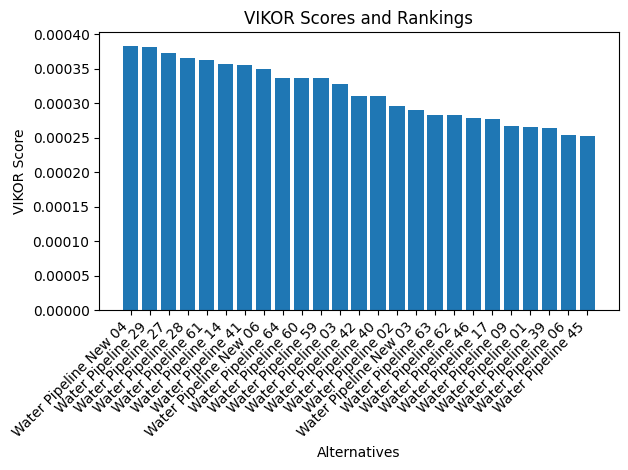

In [42]:
# Plot the chart
fig, ax = plt.subplots()
ax.bar(range(len(ranked_alternatives_all[:25])),
       vikor_scores_all[ranked_indices_all[:25]])
ax.set_xlabel('Alternatives')
ax.set_ylabel('VIKOR Score')
ax.set_title('VIKOR Scores and Rankings')
ax.set_xticks(range(len(ranked_alternatives_all[:25])))
ax.set_xticklabels(ranked_alternatives_all[:25], rotation=45, ha='right')
#plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()